In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.pyplot as plt
import xgboost
from sklearn import cross_validation, metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


/home/ayush/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.tail(100)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
4359,f9c4831ca,1000000.00,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
4360,f9d127d57,200000.00,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
4361,f9d313a90,70000.00,250000.0,0,0.0,0,0,0,0,2000000,...,0.00,0.0,0.00,0,0,0,0,0,0,0
4362,f9ddd95a0,4602500.00,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
4363,f9edee51c,18317000.00,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
4364,f9fc7103b,8000000.00,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
4365,fa132642e,740000.00,120000.0,0,0.0,0,0,0,0,0,...,240000.00,0.0,0.00,0,0,0,0,0,0,0
4366,fa2c3a369,3419333.34,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,436000.00,588000,0,300000,0,0,0,2572000
4367,fa390114d,44000.00,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,0.00,0,0,0,0,0,0,0
4368,fa3c04aae,132000.00,0.0,0,0.0,0,0,0,0,0,...,0.00,0.0,600000.00,0,0,0,0,0,0,0


In [5]:
df.shape

(4459, 4993)

In [6]:
df.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


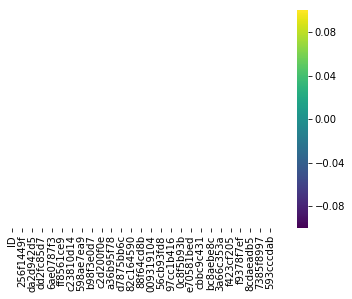

In [8]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = True,cmap = 'viridis')

In [9]:
col = df.columns

In [10]:
scale_list = df.columns[1:]

In [11]:
type(scale_list)

pandas.core.indexes.base.Index

In [12]:
sc = df[scale_list]


In [13]:
scaler = StandardScaler()
sc = scaler.fit_transform(sc)
df[scale_list] = sc
df[scale_list].head()


,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,3.893303,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,...,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852
1,-0.649177,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.038443,...,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852
2,0.492516,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,...,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852
3,-0.479137,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,...,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852
4,1.026926,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.059257,...,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852


In [16]:
X = df.drop(['target','ID'], axis=1)

Y = df['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.2)

logreg=LinearRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

y_pred
print(metrics.mean_squared_error(y_test, y_pred))

5.215524806023528e+21


In [18]:
regressor = DecisionTreeRegressor( random_state = 0)
regressor.fit(X,Y)
y_pred1 = regressor.predict(X_test)
print(metrics.mean_squared_error(y_test,y_pred1 ))



1.7761094074203194e-09


In [19]:
rand = RandomForestRegressor(n_estimators = 10,random_state = 0)
rand.fit(X,Y)
y_pred2 = rand.predict(X_test)
print(metrics.mean_squared_error(y_test,y_pred2 ))


0.15023345767896787


In [20]:

xgb = xgboost.XGBRegressor(n_estimators=35, learning_rate=0.06, gamma=0, subsample=0.6,
                           colsample_bytree=0.7, min_child_weight=4, max_depth=3)
                           
                           
xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)
print(metrics.mean_squared_error(y_test, predictions))

0.6983542408556609


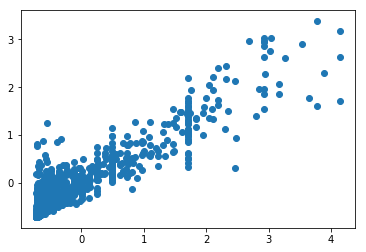

In [23]:
plt.scatter(y_test,y_pred2)

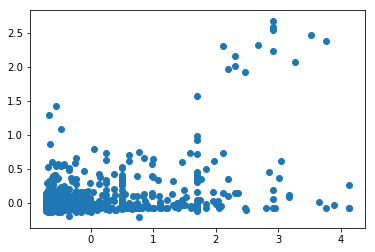

In [24]:
plt.scatter(y_test, predictions)

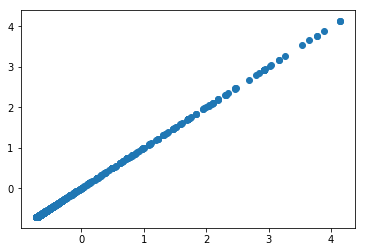

In [25]:
plt.scatter(y_test,y_pred1)

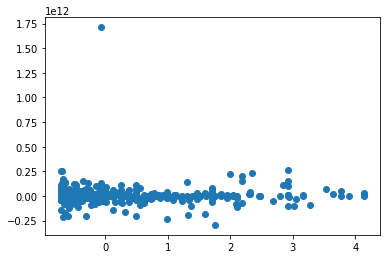

In [26]:
plt.scatter(y_test,y_pred)

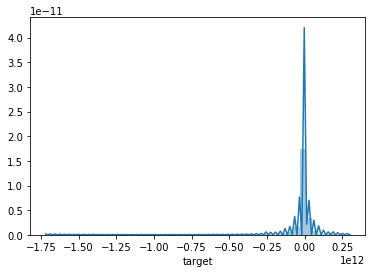

In [27]:
sns.distplot((y_test-y_pred))

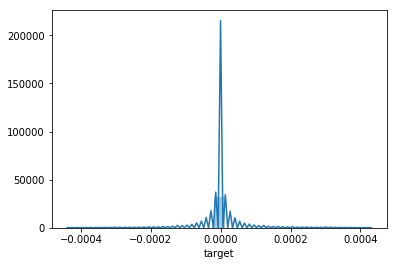

In [28]:
sns.distplot((y_test-y_pred1))

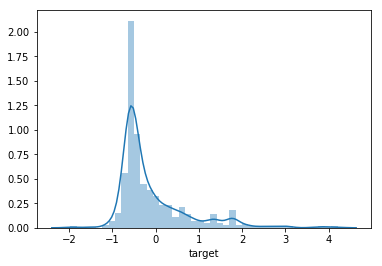

In [29]:
sns.distplot((y_test-predictions))

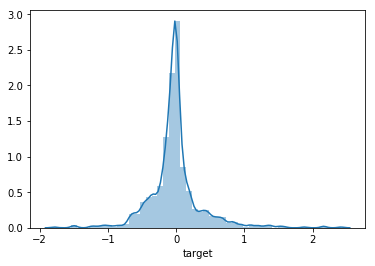

In [30]:
sns.distplot((y_test-y_pred2))